In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Latency  Experiments  

### #1 Experiment - End-to-end  Latency 
How long does it take a message we send to be delivered to the consumer?  <br>
For this test, we will create producer and consumer and repeatedly time how long it takes for a producer to send a message to the kafka cluster and then be received by our consumer 
#### Experimental setup:
System: stampede <br>
Nodes: 1 <br>
Brokers : 1  <br>
Kafka producers : 1 <br>
Kafa consumers: 1 <br>
Partitions: 1 <br>

In [165]:
latency = pd.read_csv('/home/georgeha/repos/midas_exps/streaming/latency/1_broker/kafka-latency_1_broker.csv', skipinitialspace=True) 
cols = ['Latency']
latency= latency[cols]
#print 'Mesuared %d Messages' % latency.count()
latency_mean = latency.mean()
latency_std_error = latency.std() /latency.count()**(0.5)

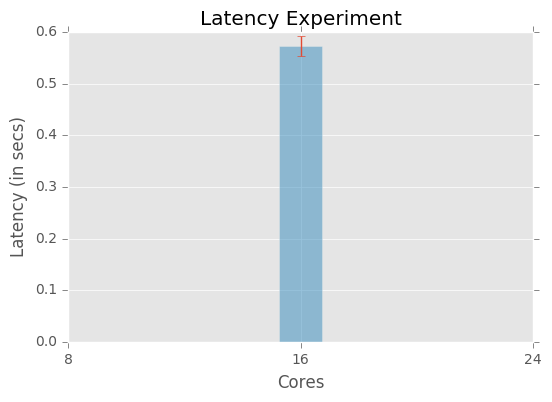

In [166]:
plt.bar(16,latency_mean, align='center',alpha=0.5,width=1.5, yerr=latency_std_error) 
plt.ylabel('Latency (in secs)')
plt.xlabel('Cores')
plt.xticks(np.array([8,16,24]))
plt.title("Latency Experiment")


### #2 Experiment -   Latency 


In [167]:
# two brokers
latency_1 = pd.read_csv('/home/georgeha/repos/midas_exps/streaming/latency/2_brokers/kafka-latency_2_brokers_1.csv', skipinitialspace=True) 
latency_2 = pd.read_csv('/home/georgeha/repos/midas_exps/streaming/latency/2_brokers/kafka-latency_2_brokers_1.csv', skipinitialspace=True) 
frames = [latency_1,latency_2]
latency_2 = pd.concat(frames)
cols = ['Latency']
latency_2= latency[cols]
print 'Mesuared %d Messages using 2 brokers' % latency_2.count()
latency_mean_2 = latency_2.mean()
latency_std_error_2 = latency_2.std() /latency_2.count()**(0.5)

# three brokers
latency_1 = pd.read_csv('/home/georgeha/repos/midas_exps/streaming/latency/3_brokers/kafka-latency_1_brokers.csv', skipinitialspace=True) 
latency_2 = pd.read_csv('/home/georgeha/repos/midas_exps/streaming/latency/3_brokers/kafka-latency_2_brokers.csv', skipinitialspace=True) 
latency_3 = pd.read_csv('/home/georgeha/repos/midas_exps/streaming/latency/3_brokers/kafka-latency_3_brokers.csv', skipinitialspace=True) 

frames = [latency_1,latency_2,latency_3]
latency_3 = pd.concat(frames)
cols = ['Latency']
latency_3= latency[cols]
print 'Mesuared %d Messages using 3 brokers' % latency_3.count()
latency_mean_3 = latency_3.mean()
latency_std_error_3 = latency_3.std() /latency_3.count()**(0.5)

Mesuared 220 Messages using 2 brokers
Mesuared 220 Messages using 3 brokers


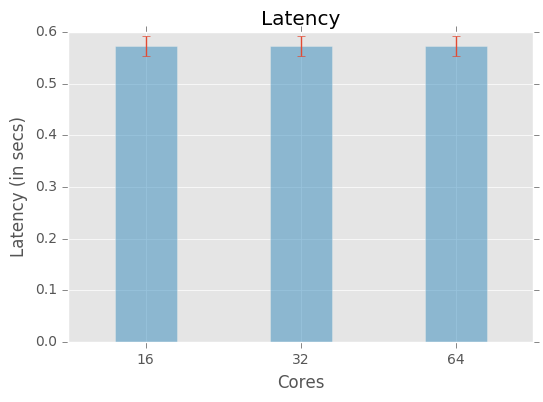

In [169]:
objects = ('16', '32', '64')
y_pos = np.arange(len(objects))

plot_latency = [latency_mean.values,latency_mean_2.values,latency_mean_3.values]
latency_error = [latency_std_error.values,latency_std_error_2.values,latency_std_error_3.values]
 
plt.bar(y_pos, plot_latency, align='center', alpha=0.5,width=0.4, yerr=latency_error)
plt.xticks(y_pos, objects)
plt.ylabel('Latency (in secs)')
plt.xlabel('Cores')
plt.title('Latency')

### Latency

system: wrangler, partitions: 1, broker 1, producer 1, consumer : 1
message size: 6mb : Points: 1000

In [170]:
directory = '/home/georgeha/quick_plots/kafka-latency.csv'
data = pd.read_csv(directory,skipinitialspace=True)

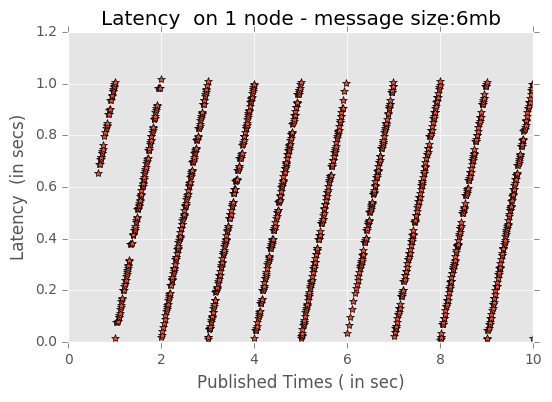

In [172]:
adata = data['0.65238']
x = np.linspace(0,adata.count(),adata.count())
plt.xlim(0,10)
#plt.xticks()
plt.plot(date_times,adata.tolist(),'*')
plt.ylabel('Latency  (in secs)')
plt.xlabel('Published Times ( in sec)')
plt.title('Latency  on 1 node - message size:6mb')

Messages have sub-second latency. Kafka flushes messages to the filesystem every one second so some messages might have up to one second latency. Another issue is that the consumer is reading the messages in-order so some messages might take longer to read (CPU delay). 

In [135]:
sent_time = data['2017-06-24T17:44:45.615631']

In [136]:
import time
import datetime
start_time = '2017-06-24T17:44:45.615631'
start_time = start_time.split('T')[1]
start_time = dateutil.parser.parse(start_time)
sent_time_ts = time.mktime(start_time.timetuple())
sent_time_ts + (start_time.microsecond)/1000000.0

1498862685.615631

In [145]:
import time
date_times = []
for cur_time in sent_time:
    cur_time = cur_time.split('T')[1]
    cur_time = dateutil.parser.parse(cur_time)
    miliseconds = cur_time.microsecond/1000000.0
    date_times.append(time.mktime(cur_time.timetuple()) + miliseconds- 1498603485- 259200)

In [171]:
start_time = '2017-06-24T17:44:45.615631'
start_time = start_time.split('T')[1]
start_time = dateutil.parser.parse(start_time)
sent_time_ts = time.mktime(start_time.timetuple())


In [154]:
t = start_time.microsecond/1000000000.0

Same settings, message_size = 28mb, points: 10000

In [16]:
directory = '/home/georgeha/repos/midas_exps/streaming/latency/1_broker/1_broker_killed_latency'
aname = '/kafka-latency.csv'
latency_saturated_data  = pd.read_csv(directory + aname ,skipinitialspace=True)
published_times = latency_saturated_data['Start_time']
latency_saturated_data = latency_saturated_data['Latency']
latency_saturated_data.head()

0    6.01215
1    6.01455
2    6.01483
3    6.01507
4    6.01533
Name: Latency, dtype: float64

In [25]:
import time, dateutil
saturated_date_times = []
for cur_time in published_times:
    cur_time = cur_time.split('T')[1]
    cur_time = dateutil.parser.parse(cur_time)
    miliseconds = cur_time.microsecond/1000000.0
    saturated_date_times.append(time.mktime(cur_time.timetuple()) + miliseconds- 1498603485-167578)

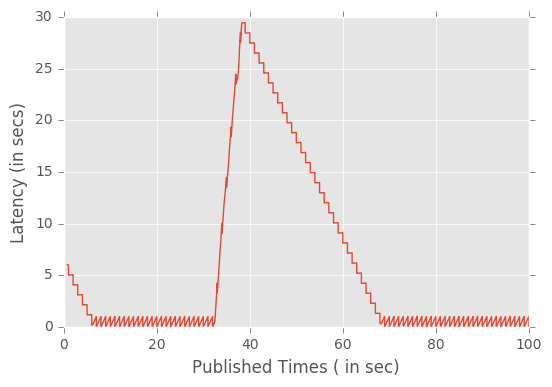

In [39]:
#x = np.linspace(0,adata.count(),adata.count())
plt.xlim(0,100)
#plt.xticks()
plt.plot(saturated_date_times,latency_saturated_data.tolist())
plt.ylabel('Latency (in secs)')
plt.xlabel('Published Times ( in sec)')

#Latency after ~= 30 secs has a spike which goes up to 30 seconds for a few seconds and then goes back to the normal behaviour. I assume that the memory of the computer was saturated at that point. More investigations need to be done there.

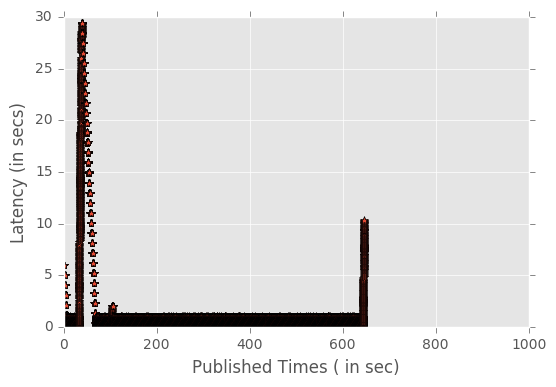

In [47]:
#x = np.linspace(0,adata.count(),adata.count())
plt.xlim(0,1000)
#plt.xticks()
plt.plot(saturated_date_times,latency_saturated_data.tolist(),'*')
plt.ylabel('Latency (in secs)')
plt.xlabel('Published Times ( in sec)')

In [40]:
#Note to myself -> use the same data to plot throughput in order to find the normal capacity of the system.

## Spark K-means

throughput = (lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)/lastReceivedBatch_records <br>
Parameters: Streaming window: 60 seconds, Number of cluster centroids, Number  of data points

In [66]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/2_run'
lastReceivedBatch_processingEndTime_dir = '/app-20170629170818-0000.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingEndTime.csv'
lastReceivedBatch_processingStartTime_dir = '/app-20170629170818-0000.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_processingStartTime.csv'
lastReceivedBatch_records_dir = '/app-20170629170818-0000.driver.PythonSparkStreamingKafkaKMeans.StreamingMetrics.streaming.lastReceivedBatch_records.csv'

lastReceivedBatch_processingEndTime  = pd.read_csv(directory + lastReceivedBatch_processingEndTime_dir ,skipinitialspace=True)
lastReceivedBatch_processingStartTime = pd.read_csv(directory + lastReceivedBatch_processingStartTime_dir,skipinitialspace=True)
lastReceivedBatch_records = pd.read_csv(directory + lastReceivedBatch_records_dir,skipinitialspace=True)

In [115]:
throughput = (lastReceivedBatch_processingEndTime-lastReceivedBatch_processingStartTime)/lastReceivedBatch_records
throughput = throughput.replace([np.inf, -np.inf], np.nan)
throughput = throughput.dropna(axis=0)
throughput = throughput['value']
throughput = throughput.tolist()
for i in xrange(len(throughput)):
    if throughput[i]<0:
        throughput[i]=0
# start_time1498774108 

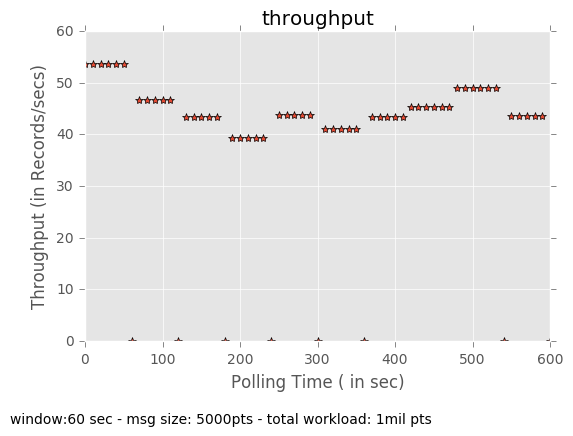

In [204]:
x_values = lastReceivedBatch_records[lastReceivedBatch_records.value!=0]
x_values = x_values['t']
x_values = x_values.tolist()
shift_time = 1498774148

for i in xrange(len(x_values)):
    x_values[i] = x_values[i] - 1498774148

#plt.xticks()
plt.xlim(0,600)
plt.plot(x_values,throughput,'*')
plt.ylabel('Throughput (in Records/secs)')
plt.xlabel('Polling Time ( in sec)')
#plt.title('window:60 sec - msg size: 5000pts - total workload: 1mil pts')
plt.title("throughput")
plt.figtext(0,-0.08,'window:60 sec - msg size: 5000pts - total workload: 1mil pts')

In [193]:
x_values[-1]

650